In [1]:
import geopandas as geop
import pandas as pd
import numpy as np
import warnings

In [2]:
# Reading crimes csv file

crime_hist = pd.read_csv('MPS LSOA Level Crime (Historical).csv')

In [3]:
# New data set with 2011 colums and new variable with sum calculation by row. 

crime_2011 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2011'))]]
crime_2011_totals = crime_2011.sum(axis=1)

In [4]:
# New data set with 2021 colums and new variable with sum calculation by LSOA (row). 

crime_2021 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2021'))]]
crime_2021_totals = crime_2021.sum(axis=1)

In [5]:
# Copy of crime data and merging of 2011 and 2021 totals by row

crime_cases = crime_hist
crime_cases ['2011 Crime Cases'] = crime_2011_totals
crime_cases ['2021 Crime Cases'] = crime_2021_totals

In [6]:
# Selection of column

crime_cases = crime_cases[['LSOA Code', 'LSOA Name', '2011 Crime Cases', '2021 Crime Cases']]

In [7]:
# Group by and summary of the dataset, grouping by LSOA Code and Name and them summary of totals by LSOA for 2011 and 2021

crime = crime_cases.groupby(['LSOA Code','LSOA Name']).agg(
    LSOA_Crime2011 =('2011 Crime Cases', 'sum'),
    LSOA_Crime2021 =('2021 Crime Cases', 'sum')
)

crime.head(5)

,,LSOA_Crime2011,LSOA_Crime2021
LSOA Code,LSOA Name,,
E01000006,Barking and Dagenham 016A,98,94
E01000007,Barking and Dagenham 015A,355,507
E01000008,Barking and Dagenham 015B,161,224
E01000009,Barking and Dagenham 016B,308,298
E01000011,Barking and Dagenham 016C,107,111


In [8]:
# Read in population by place of birth data 2011 and selection of relevant columns

POB_2011 = pd.read_excel('Country of birth.xlsx', sheet_name= '2011')
POB_2011 = POB_2011 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2011['Non UK Percentage']= 1-(POB_2011['United Kingdom']/POB_2011['All Usual residents'])

POB_2011.drop(columns='United Kingdom', inplace=True)
#POB_2011 = POB_2011 [['LSOA code', 'All Usual residents', 'Non UK Percentage']]
POB_2011 = POB_2011.rename(columns={'LSOA code': 'LSOA Code'})
POB_2011.head(5)

,LSOA Code,All Usual residents,Non UK Percentage
0,E01000001,1465,0.326962
1,E01000002,1436,0.270195
2,E01000003,1346,0.324666
3,E01000005,985,0.392893
4,E01032739,1044,0.501916


In [9]:
# Read in population by place of birth data 2021 and selection of relevant columns

POB_2021 = pd.read_excel('Country of birth.xlsx', sheet_name= '2021')
POB_2021 = POB_2021 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2021['Non UK Percentage']= 1-(POB_2021['United Kingdom']/POB_2021['All Usual residents'])
POB_2021.drop(columns='United Kingdom' ,inplace=True)

POB_2021 = POB_2021.rename(columns={'LSOA code': 'LSOA Code'})
POB_2021.head(5)

,LSOA Code,All Usual residents,Non UK Percentage
0,E01000001,1478,0.408660
1,E01000002,1382,0.450796
2,E01000003,1613,0.429014
3,E01000005,1098,0.485428
4,E01032739,1621,0.570019


In [10]:
# Find number of null values in POB 2011 and 2022 datasets

# Find mean, count and number of null values for each dataset

# To fix: printing out the fivenum values(i.e. min, 2nd, 3rd, 4th quartile and max)


yearnum = int()

for n in [POB_2011, POB_2021]:
    data_name = [name for name, obj in locals().items() if obj is n][0]
    n['Non UK Percentage'] = pd.Series(n['Non UK Percentage'])
    #Get summary statistics
    #%8.2f
    fivenum_summary = np.percentile(n['Non UK Percentage'].astype(float).dropna(), [0, 25, 50, 75, 100])
    print("{} statistics:".format(data_name) + " Min:{}".format(round(fivenum_summary[0],3)) + ", Q1:{} ".format(round(fivenum_summary[1],3)) + ", Median:{}".format(round(fivenum_summary[2],3))  + ", Q3:{}".format(round(fivenum_summary[3],3)) + ", Max:{}".format(round(fivenum_summary[4],3)))
    
    print("Mean Non UK population percentage for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].mean()))
    print("Number of null population percentage values for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].isnull().sum()))
    print("Count of LSOAs with population percentage values  for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].count()))


POB_2011 statistics: Min:0.036, Q1:0.258 , Median:0.373, Q3:0.468, Max:0.823
Mean Non UK population percentage for POB_2011  is 0.3629362549727461
Number of null population percentage values for POB_2011  is 37
Count of LSOAs with population percentage values  for POB_2011  is 4957
POB_2021 statistics: Min:0.045, Q1:0.309 , Median:0.408, Q3:0.495, Max:0.816
Mean Non UK population percentage for POB_2021  is 0.40152347080770884
Number of null population percentage values for POB_2021  is 0
Count of LSOAs with population percentage values  for POB_2021  is 4994


In [11]:
# Outer join with 2011 population

crime = crime.merge(POB_2011, on='LSOA Code', how='outer')

In [12]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2011 Population'})

In [13]:
# Outer join with 2021 population

crime = crime.merge(POB_2021, on='LSOA Code', how='outer')

In [14]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2021 Population'})
crime=crime.rename(columns={'Non UK Percentage_x': '2011 Non UK Percentage'})
crime=crime.rename(columns={'Non UK Percentage_y': '2021 Non UK Percentage'})

In [15]:
crime.head(5)

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952


In [16]:
# Checking if there are any missing values. There are 6 rows missing crime data. 

crime.isnull().sum()

LSOA Code                  0
LSOA_Crime2011             6
LSOA_Crime2021             6
2011 Population            0
2011 Non UK Percentage    37
2021 Population            0
2021 Non UK Percentage     0
dtype: int64

In [17]:
# Crime copy for final dataset
crime_final = crime.copy()

In [18]:
# Calculation of 2011 crime rate by 1000 people

crime_final ['2011 Crime/1000 people'] = crime_final ['LSOA_Crime2011']/ (crime_final['2011 Population']/1000)

In [19]:
# Calculation of 2021 crime rate by 1000 people

crime_final ['2021 Crime/1000 people'] = crime_final ['LSOA_Crime2021']/ (crime_final['2021 Population']/1000)



In [36]:
# Reading crime csv file

#crime_hist = pd.read_excel('occupation.xlsx')
# Read multiple sheets
sheet_names = ['2011', '2021', 'change 2011-2021']  # List of sheet names
df_dict = pd.read_excel('occupation.xlsx', sheet_name=sheet_names)

# Access each DataFrame by sheet name
df_2011 = df_dict['2011']
df_2021 = df_dict['2021']
df_change = df_dict['change 2011-2021']


In [37]:
df_2011.rename(columns={'All usual residents aged 16-74 in employment':'Total Workforce'}, inplace=True)
df_2011.head(5)

,local authority code,local authority name,LSOA code,Total Workforce,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Adminis-trative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,"8. Process, plant and machine operatives",9. Elementary occupations
0,E09000001,City of London,E01000001,926,167,446,208,53,15,17,6,2,12
1,E09000001,City of London,E01000002,910,171,417,207,61,12,8,18,3,13
2,E09000001,City of London,E01000003,764,89,285,183,67,19,36,29,11,45
3,E09000001,City of London,E01000005,476,49,81,90,64,31,33,33,26,69
4,E09000001,City of London,E01032739,819,180,286,223,51,22,27,11,8,11


In [38]:
df_2011.isnull().sum()

local authority code                                   0
local authority name                                   0
LSOA code                                              0
Total Workforce                                        0
1. Managers, directors and senior officials            0
2. Professional occupations                            0
3. Associate professional and technical occupations    0
4. Adminis-trative and secretarial occupations         0
5. Skilled trades occupations                          0
6. Caring, leisure and other service occupations       0
7. Sales and customer service occupations              0
8. Process, plant and machine operatives               0
9. Elementary occupations                              0
dtype: int64

In [40]:
df_2021.rename(columns={'All usual residents aged 16 and over in employment':'Total Workforce'}, inplace=True)
df_2021.head(5)

,local authority code,local authority name,LSOA code,Total Workforce,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Adminis-trative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,"8. Process, plant and machine operatives",9. Elementary occupations
0,E09000001,City of London,E01000001,868,194,406,184,39,5,19,11,6,4
1,E09000001,City of London,E01000002,875,218,414,187,35,3,5,3,3,7
2,E09000001,City of London,E01000003,1002,191,388,217,72,28,27,26,11,42
3,E09000001,City of London,E01000005,494,52,129,61,43,21,52,34,16,86
4,E09000001,City of London,E01032739,1184,253,540,216,48,23,37,40,6,21


In [41]:
column_categories = {
    'White Collar': ['1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations'],
    'Blue Collar': ['4. Adminis-trative and secretarial occupations', '5. Skilled trades occupations', '8. Process, plant and machine operatives'],
    'Elementary': ['6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '9. Elementary occupations']
}


In [42]:
# 2011 data aggreated in 3 groups, update the proportion of each group

df_2011['White Collar Sum'] = df_2011[column_categories['White Collar']].sum(axis=1)
df_2011['White Collar Prop'] = df_2011['White Collar Sum'] / df_2011['Total Workforce']

df_2011['Blue Collar Sum'] = df_2011[column_categories['Blue Collar']].sum(axis=1)
df_2011['Blue Collar Prop'] = df_2011['Blue Collar Sum'] / df_2011['Total Workforce']

df_2011['Elementary Sum'] = df_2011[column_categories['Elementary']].sum(axis=1)
df_2011['Elementary Prop'] = df_2011['Elementary Sum'] / df_2011['Total Workforce']

df_2011 = df_2011.iloc[:, np.r_[0:3, -6:0]]
df_2011.head(5)

,local authority code,local authority name,LSOA code,White Collar Sum,White Collar Prop,Blue Collar Sum,Blue Collar Prop,Elementary Sum,Elementary Prop
0,E09000001,City of London,E01000001,821,0.886609,70,0.075594,35,0.037797
1,E09000001,City of London,E01000002,795,0.873626,76,0.083516,39,0.042857
2,E09000001,City of London,E01000003,557,0.729058,97,0.126963,110,0.143979
3,E09000001,City of London,E01000005,220,0.462185,121,0.254202,135,0.283613
4,E09000001,City of London,E01032739,689,0.841270,81,0.098901,49,0.059829


In [43]:
# 2021 data aggreated in 3 groups, update the proportion of each group

df_2021['White Collar Sum'] = df_2021[column_categories['White Collar']].sum(axis=1)
df_2021['White Collar Prop'] = df_2021['White Collar Sum'] / df_2021['Total Workforce']

df_2021['Blue Collar Sum'] = df_2021[column_categories['Blue Collar']].sum(axis=1)
df_2021['Blue Collar Prop'] = df_2021['Blue Collar Sum'] / df_2021['Total Workforce']

df_2021['Elementary Sum'] = df_2021[column_categories['Elementary']].sum(axis=1)
df_2021['Elementary Prop'] = df_2021['Elementary Sum'] / df_2021['Total Workforce']

df_2021 = df_2021.iloc[:, np.r_[2, -6:0]]
df_2021.head(5)

,LSOA code,White Collar Sum,White Collar Prop,Blue Collar Sum,Blue Collar Prop,Elementary Sum,Elementary Prop
0,E01000001,784,0.903226,50,0.057604,34,0.039171
1,E01000002,819,0.936000,41,0.046857,15,0.017143
2,E01000003,796,0.794411,111,0.110778,95,0.094810
3,E01000005,242,0.489879,80,0.161943,172,0.348178
4,E01032739,1009,0.852196,77,0.065034,98,0.082770


In [44]:
# 2011 data left joined with 2021 by LSOA code

merged_df = pd.merge(df_2011, df_2021, on='LSOA code', suffixes = (' 2011', ' 2021'), how='left')
merged_df.rename(columns={'LSOA code': 'LSOA Code'}, inplace = True)
merged_df.drop(columns=['local authority code','local authority name'], inplace=True)
merged_df.head(5)

,LSOA Code,White Collar Sum 2011,White Collar Prop 2011,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E01000001,821,0.886609,70,0.075594,35,0.037797,784,0.903226,50,0.057604,34,0.039171
1,E01000002,795,0.873626,76,0.083516,39,0.042857,819,0.936000,41,0.046857,15,0.017143
2,E01000003,557,0.729058,97,0.126963,110,0.143979,796,0.794411,111,0.110778,95,0.094810
3,E01000005,220,0.462185,121,0.254202,135,0.283613,242,0.489879,80,0.161943,172,0.348178
4,E01032739,689,0.841270,81,0.098901,49,0.059829,1009,0.852196,77,0.065034,98,0.082770


In [45]:
# Some simple statistics for each group

print("The mean for each group: ")
print(merged_df.iloc[:,3:].mean())
print()
print("The standard deviation for each group: ")
print(merged_df.iloc[:,3:].std())
print()
print("The five numbers for each group: ")
print(merged_df.iloc[:,3:].quantile([0, 0.25, 0.5, 0.75, 1]))

The mean for each group: 
Blue Collar Sum 2011      197.894473
Blue Collar Prop 2011       0.253519
Elementary Sum 2011       199.692431
Elementary Prop 2011        0.258523
White Collar Sum 2021     485.943933
White Collar Prop 2021      0.550012
Blue Collar Sum 2021      183.773728
Blue Collar Prop 2021       0.213815
Elementary Sum 2021       203.400080
Elementary Prop 2021        0.236173
dtype: float64

The standard deviation for each group: 
Blue Collar Sum 2011       68.159236
Blue Collar Prop 2011       0.080192
Elementary Sum 2011        81.144250
Elementary Prop 2011        0.102680
White Collar Sum 2021     194.709248
White Collar Prop 2021      0.159419
Blue Collar Sum 2021       68.026368
Blue Collar Prop 2021       0.074444
Elementary Sum 2021        90.024265
Elementary Prop 2021        0.098754
dtype: float64

The five numbers for each group: 
      Blue Collar Sum 2011  Blue Collar Prop 2011  Elementary Sum 2011  \
0.00                   0.0               0.054945     

In [46]:
crime_final = crime_final.merge(merged_df, on = 'LSOA Code', how='outer')
crime_final.head(5)
#Crime_Occupation[Crime_Occupation.isnull().any(axis=1)]

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people,White Collar Sum 2011,...,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915,57.545508,51.031488,277,...,257,0.329065,247,0.316261,299,0.337472,276,0.311512,311,0.351016
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635,255.212078,174.406605,218,...,172,0.283361,217,0.357496,579,0.420174,306,0.222061,493,0.357765
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908,104.274611,124.791086,132,...,144,0.264220,269,0.493578,169,0.262422,178,0.276398,297,0.461180
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883,173.716864,165.005537,296,...,205,0.266580,268,0.348505,243,0.310345,249,0.318008,291,0.371648
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952,65.483476,65.371025,239,...,180,0.260492,272,0.393632,211,0.286685,260,0.353261,265,0.360054


In [47]:
# Final crime data

crime_final.head(5)

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people,White Collar Sum 2011,...,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915,57.545508,51.031488,277,...,257,0.329065,247,0.316261,299,0.337472,276,0.311512,311,0.351016
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635,255.212078,174.406605,218,...,172,0.283361,217,0.357496,579,0.420174,306,0.222061,493,0.357765
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908,104.274611,124.791086,132,...,144,0.264220,269,0.493578,169,0.262422,178,0.276398,297,0.461180
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883,173.716864,165.005537,296,...,205,0.266580,268,0.348505,243,0.310345,249,0.318008,291,0.371648
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952,65.483476,65.371025,239,...,180,0.260492,272,0.393632,211,0.286685,260,0.353261,265,0.360054


In [48]:
#List of missing values

crime_final[crime_final.isnull().any(axis=1)]


,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people,White Collar Sum 2011,...,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
4666,E01033866,154.0,176.0,0,NaN,1118,0.650268,inf,157.423971,0,...,0,NaN,0,NaN,593,0.807902,81,0.110354,60,0.081744
4674,E01033874,513.0,199.0,0,NaN,1153,0.573287,inf,172.593235,0,...,0,NaN,0,NaN,584,0.846377,64,0.092754,42,0.060870
4690,E01033915,2.0,95.0,0,NaN,1487,0.516476,inf,63.887021,0,...,0,NaN,0,NaN,302,0.548094,113,0.205082,136,0.246824
4696,E01033921,5.0,80.0,0,NaN,1657,0.595051,inf,48.280024,0,...,0,NaN,0,NaN,557,0.606754,168,0.183007,193,0.210240
4715,E01033940,150.0,277.0,0,NaN,2352,0.560374,inf,117.772109,0,...,0,NaN,0,NaN,773,0.714418,128,0.118299,181,0.167283
4717,E01033942,286.0,415.0,0,NaN,1603,0.585777,inf,258.889582,0,...,0,NaN,0,NaN,662,0.746336,94,0.105975,131,0.147689
4727,E01034031,37.0,50.0,0,NaN,1309,0.751719,inf,38.197097,0,...,0,NaN,0,NaN,553,0.774510,83,0.116246,78,0.109244
4751,E01034147,5.0,9.0,0,NaN,1120,0.646429,inf,8.035714,0,...,0,NaN,0,NaN,598,0.705189,112,0.132075,138,0.162736
4752,E01034148,268.0,469.0,0,NaN,1626,0.576876,inf,288.437884,0,...,0,NaN,0,NaN,742,0.690233,142,0.132093,191,0.177674
4765,E01034177,18.0,67.0,0,NaN,1603,0.452901,inf,41.796631,0,...,0,NaN,0,NaN,521,0.622461,140,0.167264,176,0.210275


In [22]:
# Reading 2021 LSOA Boundaries

lsoa_2021 = geop.read_file('LSOA_Boundaries_2021.shp')


In [23]:
# Change of column name

lsoa_2021 = lsoa_2021.rename(columns={'LSOA21CD':'LSOA Code'})


In [49]:
# Selection of crime data for 2011 only

crime_2011 = crime_final.copy()
crime_2011 = crime_2011 [['LSOA Code', '2011 Crime/1000 people','2011 Population','2011 Non UK Percentage', 'White Collar Sum 2011','White Collar Prop 2011',	'Blue Collar Sum 2011',	'Blue Collar Prop 2011',	'Elementary Sum 2011',	'Elementary Prop 2011']]

In [50]:
crime_2011.head()

,LSOA Code,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage,White Collar Sum 2011,White Collar Prop 2011,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011
0,E01000006,57.545508,1703,0.513212,277,0.354673,257,0.329065,247,0.316261
1,E01000007,255.212078,1391,0.545651,218,0.359143,172,0.283361,217,0.357496
2,E01000008,104.274611,1544,0.522021,132,0.242202,144,0.264220,269,0.493578
3,E01000009,173.716864,1773,0.586012,296,0.384915,205,0.266580,268,0.348505
4,E01000011,65.483476,1634,0.569767,239,0.345876,180,0.260492,272,0.393632


In [26]:
# Merging the 2011 crime data with the 2011 LSOA Boundaries.
# Merging the geometry columns based on LSOA Code so that we have a 1-1 mapping between LSOA code, geometry and calculated columns.
# Need to reset the index for LSOA column for later re-use.

CrimeMap_2011 = lsoa_2021.merge(crime_2011)
CrimeMap_2011 = CrimeMap_2011.dissolve('LSOA Code')
CrimeMap_2011.reset_index(inplace=True)

In [27]:
# View of Merged Data

CrimeMap_2011.head(5)

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage
0,E01000001,"POLYGON ((532275.938 181637.750, 532272.750 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1465,0.326962
1,E01000002,"POLYGON ((532624.323 181842.310, 532626.495 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1436,0.270195
2,E01000003,"POLYGON ((532236.500 181891.563, 532224.624 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1346,0.324666
3,E01000005,"POLYGON ((533615.622 181406.023, 533619.062 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,985,0.392893
4,E01000006,"POLYGON ((545183.927 184145.062, 545179.170 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,57.545508,1703,0.513212


In [28]:
# There are only 6 LSOAs with missing crime rate and 37 with a missing immigration rate

CrimeMap_2011.isnull().sum()

LSOA Code                    0
geometry                     0
OA21CD                       0
LSOA21NM                     0
LSOA21NMW                 4994
BNG_E                        0
BNG_N                        0
LAT                          0
LONG                         0
GlobalID                     0
2011 Crime/1000 people      10
2011 Population              0
2011 Non UK Percentage      37
dtype: int64

In [29]:
# These are the rows with the missing crime rate values

CrimeMap_2011[CrimeMap_2011.isnull().any(axis=1)]

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage
0,E01000001,"POLYGON ((532275.938 181637.750, 532272.750 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1465,0.326962
1,E01000002,"POLYGON ((532624.323 181842.310, 532626.495 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1436,0.270195
2,E01000003,"POLYGON ((532236.500 181891.563, 532224.624 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1346,0.324666
3,E01000005,"POLYGON ((533615.622 181406.023, 533619.062 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,985,0.392893
4,E01000006,"POLYGON ((545183.927 184145.062, 545179.170 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,57.545508,1703,0.513212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,"POLYGON ((527200.571 179371.006, 527200.034 17...",E00023681,Westminster 019G,None,527479,179532,51.5004,-0.164800,8040735f-c089-480c-8206-7e2d3dbcf368,439.961575,3123,0.575088
4990,E01035719,"POLYGON ((530027.347 178655.303, 530026.318 17...",E00024024,Westminster 021F,None,530131,178781,51.4930,-0.126890,18517a8e-60e9-4199-825d-22ba74251069,103.103103,999,0.417417
4991,E01035720,"POLYGON ((529937.035 178468.282, 529937.633 17...",E00024029,Westminster 021G,None,530019,178421,51.4898,-0.128630,6d70fe2b-e242-4d23-a097-3eaf6c3fa096,69.955157,1115,0.409865
4992,E01035721,"POLYGON ((528473.884 178196.720, 528463.322 17...",E00023532,Westminster 023H,None,528536,178558,51.4914,-0.149930,741b5bac-94c6-4dc6-ba81-1094c1c58e4d,287.187040,2716,0.442194


<Axes: >

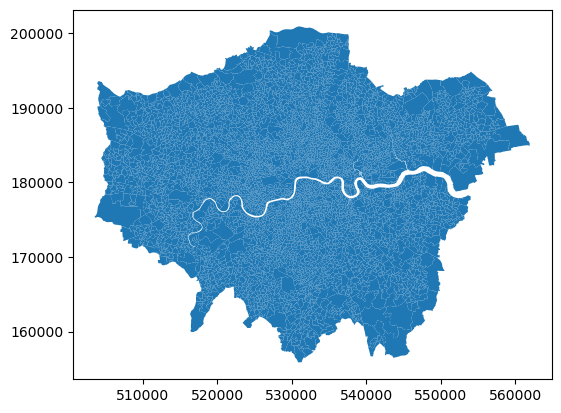

In [30]:
# This plot shows that there are some boundaries missing from the data

CrimeMap_2011.plot()

In [52]:
# Selection of crime data for 2021 only

crime_2021 = crime_final.copy()
crime_2021 = crime_2021 [['LSOA Code', '2021 Crime/1000 people','2021 Population','2021 Non UK Percentage','White Collar Sum 2021','White Collar Prop 2021',	'Blue Collar Sum 2021',	'Blue Collar Prop 2021',	'Elementary Sum 2021',	'Elementary Prop 2021']]
crime_2021.head(5)

,LSOA Code,2021 Crime/1000 people,2021 Population,2021 Non UK Percentage,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E01000006,51.031488,1842,0.517915,299,0.337472,276,0.311512,311,0.351016
1,E01000007,174.406605,2907,0.579635,579,0.420174,306,0.222061,493,0.357765
2,E01000008,124.791086,1795,0.486908,169,0.262422,178,0.276398,297,0.461180
3,E01000009,165.005537,1806,0.601883,243,0.310345,249,0.318008,291,0.371648
4,E01000011,65.371025,1698,0.608952,211,0.286685,260,0.353261,265,0.360054


In [32]:
# Merging the 2021 crime data with the 2021 LSOA Boundaries
# Merging the geometry columns based on LSOA Code so that we have a 1-1 mapping between LSOA code, geometry and calculated columns.
# Need to reset the index for LSOA column for later re-use.

CrimeMap_2021 = lsoa_2021.merge(crime_2021)
CrimeMap_2021 = CrimeMap_2021.dissolve('LSOA Code')
CrimeMap_2021.reset_index(inplace=True)

In [33]:
# View of Merged Data

CrimeMap_2021.head(5)

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2021 Crime/1000 people,2021 Population,2021 Non UK Percentage
0,E01000001,"POLYGON ((532275.938 181637.750, 532272.750 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1478,0.408660
1,E01000002,"POLYGON ((532624.323 181842.310, 532626.495 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1382,0.450796
2,E01000003,"POLYGON ((532236.500 181891.563, 532224.624 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1613,0.429014
3,E01000005,"POLYGON ((533615.622 181406.023, 533619.062 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,1098,0.485428
4,E01000006,"POLYGON ((545183.927 184145.062, 545179.170 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,51.031488,1842,0.517915


<Axes: >

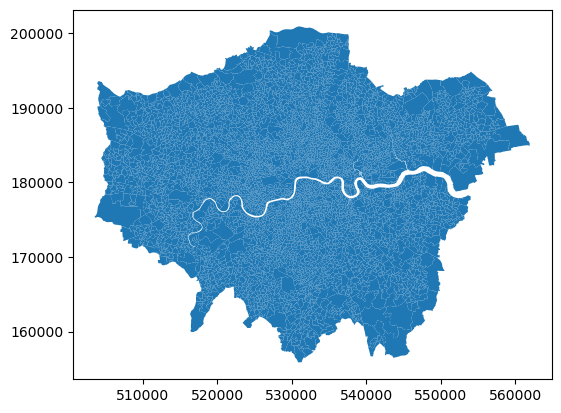

In [34]:
# This plot shows that we are not missing any boundaries for 2021

CrimeMap_2021.plot()

In [35]:
# There are only 6 LSOAs with missing crime rate. LSOA21NMW does not matter to us.

CrimeMap_2021.isnull().sum()

LSOA Code                    0
geometry                     0
OA21CD                       0
LSOA21NM                     0
LSOA21NMW                 4994
BNG_E                        0
BNG_N                        0
LAT                          0
LONG                         0
GlobalID                     0
2021 Crime/1000 people       6
2021 Population              0
2021 Non UK Percentage       0
dtype: int64